In [1]:
import pandas as pd
import numpy as np
import re, os, time, json, csv

import nltk as nlp
from nltk.stem import WordNetLemmatizer

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

import pyperclip

from gensim.models import word2vec

In [2]:
#load master speeches dataframe
df=pd.read_excel(r'C:\Users\Vivek Rao\Desktop\IDS\Digital\McRobbie NLP\speeches\master_speeches.xlsx')
# df.head()

In [4]:
#find missing values in the contents column
df[df.contents.isna()==True]

,date,venue,title,contents


In [4]:
#find total number of speeches delivered
print(len(df))
#find total number of words spoken
words_len=0
for i in range(len(df)):
    df['contents'][i]
    words_len+=len(df['contents'][i].split())
print(words_len)

501
685415


In [9]:
#create a year column
# for i in range(len(df)):
#     df.year[i]=df.date[i][-4:]
# df.year

#create a column for number of times a substring appears in a cell


#later on, we can aggregate number of appearances by year
for i in range(len(df.contents)):
    print(df.contents[i].lower().count('equit'))
# sum(df.world)

0
0
0
1
0
0
0
0
0
0
0
0
5
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
0
0
0
0
0
0
8
1
0
0
0
0
0
13
0
1
0
0
0
0

In [44]:
df.to_excel('world.xlsx')

In [7]:
#how many times does McRobbie say "pleased?"
masterfile=open(r'C:\Users\Vivek Rao\Desktop\IDS\Digital\McRobbie NLP\speeches\master.txt', 'r', encoding='utf-8').read()
masterfile.lower().count('thankfully')

# count=0
# for i in masterfile:
#     if ('thank' in i) and ('Fred' in i):
#         count+=1
#         print(i)
#     else:
#         pass
    
# print(count)

2

In [21]:
#count number of lines
count = len(open(r'C:\Users\Vivek Rao\Desktop\IDS\Digital\McRobbie NLP\speeches\master.txt', encoding='utf-8').read())
count

4279644

In [70]:
#create a text file with everything
masterfile=open(r'C:\Users\Vivek Rao\Desktop\IDS\Digital\McRobbie NLP\speeches\master.txt', 'a', encoding='utf-8')
for i in range(len(df)):
    copy=df.contents[i]
#     masterfile.open(r'C:\Users\Vivek Rao\Desktop\IDS\Digital\McRobbie NLP\speeches\master.txt', 'a')
    masterfile.write(copy)
    masterfile.write('\n\n<|endoftext|>\n\n')

masterfile.close()

In [15]:
#Indiana University is ________
masterfile=open(r'C:\Users\Vivek Rao\Desktop\IDS\Digital\McRobbie NLP\speeches\master.txt', 'r', encoding='utf-8', errors='ignore')
masterfile=masterfile.read()
IUregex=re.compile(r'IU\sis\s(.*)\.')
t0=time.time()
variables=IUregex.findall(df.contents)
# print(len(variables))
for i in variables:
    print(i)
# print(variables)
# print('Time elapsed: {} seconds'.format(time.time()-t0))

for i in df.contents:
    

# am_file=open(r'C:\Users\Vivek Rao\Desktop\IDS\Digital\McRobbie NLP\speeches\iam.txt', 'w+', encoding='utf-8', errors='ignore')

# for i in range(len(variables)):
#     try:
#         am_file.write(variables[i][1] + "\n")
        
#     except:
#         print("error with" + str(variables[i]))

# am_file.close()

the largest educator of both in-state and minority students
also the prime mover in life and health sciences across Indiana
urgently focused on ways to detect, treat, manage, and ultimately eradicate the threat of this deadly virus. Details can be found at research.impact.iu.edu/coronavirus. And the same is true at universities all over the country, as their collective might is now turned squarely towards this grave problem. As Dr. Harvey Fineberg, a former president of the National Academy of Medicine, put it just a few days ago, the ultimate goal of the nation's research enterprise is not just to flatten the curve, but to crush the curve and ultimately wipe out this pandemic
assisting IU Health by making rooms available in Briscoe Quad in Bloomington to medical workers for respite care or to quarantine from their families. Likewise, we are also making rooms available in University Tower at IUPUI for similar reasons to house medical workers from IU Health and other area hospitals, and

In [5]:
#find sentences around thank
#Indiana University is ________
masterfile=open(r'C:\Users\Vivek Rao\Desktop\IDS\Digital\McRobbie NLP\speeches\master.txt', 'r', encoding='utf-8', errors='ignore')
masterfile=masterfile.read()
IUregex=re.compile(r'(\n|\.\s)Thank(.*)\.')
variables=IUregex.findall(masterfile)
# print(variables)
thank1=open(r'C:\Users\Vivek Rao\Desktop\IDS\Digital\McRobbie NLP\speeches\thank_new_start.txt', 'w', encoding='utf-8', errors='ignore')
for thanked in variables:
    thank1.write(thanked[1])
#     thank1.write('\t')
#     thank1.write(thanked[1])
    thank1.write('\n')
thank1.close()

In [67]:
df_iam=pd.read_excel(r'C:\Users\Vivek Rao\Desktop\IDS\Digital\McRobbie NLP\speeches\iam.xlsx')
fillers=['very','truly','also','further','a','particularly','immensely','therefore','greatly','extremely','especially','personally','just','once again','being somewhat','enormously','deeply','proud to','most','only','here to','not']
for i in range(len(df_iam)):
    if df_iam['Column1'][i].split()[0] in fillers:
        print(df_iam['Column1'][i].split()[0], df_iam['Column1'][i].split()[1])
    
    elif df_iam['Column1'][i].split()[0] in fillers and df_iam['Column1'][i].split()[1] in fillers:
        print(df_iam['Column1'][i].split()[0], df_iam['Column1'][i].split()[1], df_iam['Column1'][i].split()[2])
        
    else:
        print(" ", " ", df_iam['Column1'][i].split()[0])

    sure
very pleased
    sure
    fond
further recommending
very pleased
very pleased
    pleased
very pleased
a proud
particularly proud
immensely proud
very pleased
    delighted
very pleased
    pleased
    pleased
deeply disappointed
very pleased
very proud
very proud
    told
    delighted
    delighted
    pleased
    pleased
extremely pleased
therefore asking
    sure
very pleased
    pleased
also very
also very
very pleased
very pleased
very pleased
very pleased
also very
very pleased
    struck
very pleased
very pleased
very pleased
greatly honored
    sure
very pleased
very pleased
also very
    pleased
very pleased
    honored
very pleased
    pleased
very pleased
    honored
    grateful
    privileged
very pleased
    privileged
    pleased
    sure
    delighted
also very
very pleased
very pleased
very pleased
very pleased
very pleased
    delighted
very pleased
very pleased
very pleased
greatly honored
    delighted
very pleased
extremely pleased
    IU
    delighted
  

In [50]:
#frequency distribution
#stop words from https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
dist = nlp.FreqDist([word for word in masterfile.lower().split() if not word in set(nlp.corpus.stopwords.words('english'))])
dist

#can we write frequency distribution to a file?
# freq_dist=open(r'C:\Users\Vivek Rao\Desktop\IDS\Digital\McRobbie NLP\speeches\freqdist.txt', 'r', encoding='utf-8', errors='ignore')
# freq_dist.write(dist)
# freq_dist.close()
# print("frequency of words: ",dist)

FreqDist({'iu': 25785, 'indiana': 24156, 'university': 21385, 'also': 15567, 'school': 12176, 'new': 11977, 'one': 11681, 'many': 11372, 'students': 10703, 'research': 10657, ...})

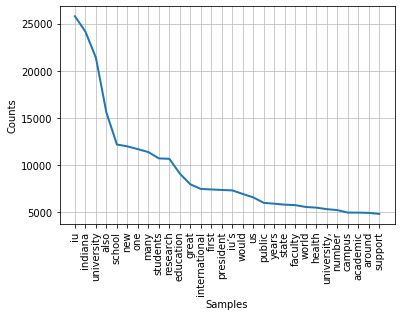

AxesSubplot(0.125,0.125;0.775x0.755)
[('iu', 25785), ('indiana', 24156), ('university', 21385), ('also', 15567), ('school', 12176), ('new', 11977), ('one', 11681), ('many', 11372), ('students', 10703), ('research', 10657), ('education', 9082), ('great', 7952), ('international', 7460), ('first', 7408), ('president', 7354), ('iu’s', 7306), ('would', 6927), ('us', 6563), ('public', 5984), ('years', 5894), ('state', 5794), ('faculty', 5744), ('world', 5548), ('health', 5478), ('university,', 5319)]


In [51]:
type(dist)
print(dist.plot(30, cumulative=False))
print(dist.most_common(25))

# freq_dist=open(r'C:\Users\Vivek Rao\Desktop\IDS\Digital\McRobbie NLP\speeches\freqdist.txt', 'w+', encoding='utf-8', errors='ignore')
# freq_dist.write(dist)
# freq_dist.close()

In [53]:
import csv
#save results to file: http://curriculum.dhbridge.org/modules/module13.html

csv_file=open(r'C:\Users\Vivek Rao\Desktop\IDS\Digital\McRobbie NLP\speeches\freqdist.csv', 'w')
file=csv.writer(csv_file)
for i in range(200):
    file.writerow(dist.most_common(200)[i])
    
csv_file.close()

In [12]:
#clean sentences
df_cleaned = df.copy()

wordnet_lemmatizer = WordNetLemmatizer()

#write function
def clean_text(text):
    #lowercase text first
    text=text.lower()
    text=text.replace('\n', ' ')
    text=text.replace('\t', ' ')
    tokens = nltk.word_tokenize(text)
    text=[word for word in tokens if not word in set(nlp.corpus.stopwords.words('english'))]
    stems = []
    for item in text:
        stems.append(wordnet_lemmatizer.lemmatize(item))
    return stems

In [15]:
t0=time.time()
tfidf = TfidfVectorizer(stop_words='english', tokenizer=clean_text, min_df=0.025, max_df=.5)
tfs = tfidf.fit_transform(df.contents)
print('Time elapsed: {} seconds'.format(time.time()-t0))
tfs_reduced = TruncatedSVD().fit_transform(tfs) #n_components=100, random_state=0).fit_transform(tfs)
print(tfs_reduced)

C:\Users\Vivek Rao\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le', 'u'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Time elapsed: 1006.5669839382172 seconds
[[ 0.2787016   0.13508773]
 [ 0.49859576 -0.28933613]
 [ 0.22744674 -0.14627315]
 ...
 [ 0.20220549  0.10041032]
 [ 0.2420194   0.05876939]
 [ 0.33800877 -0.07112616]]


In [25]:
tfs_reduced = TruncatedSVD(n_components=3, random_state=0).fit_transform(tfs)
print(tfs_reduced, len(tfs_reduced))

speech_title = df.title.to_list()
speech = df.contents.to_list()
dict={}
for speech_title, speech in zip(speech_title, speech):
    dict[speech_title]=speech
    
list(dict.keys())

# len(tfs_reduced)

['Dedication of the Elinor Ostrom Statue and Ostrom Commons',
 'Economic Club of Indiana ',
 'Report to the Trustees of Indiana University\n',
 'Recommendations to the Board of Trustees on the removal of David Starr Jordan’s name from campus structures and spaces\n',
 'Introduction to Bicentennial Strategic Plan Final Reports',
 'Presentation of President’s Medal to Jon Vickers',
 'NASEM Voting Webinar: Will our votes be secure and counted in 2020?\n',
 'Board of Trustees Business Meeting Retirement Remarks',
 'Statement to Board of Trustees on FY2020 External Grant Funding and Private Philanthropy\n',
 'Remarks to the Board of Trustees Academic Affairs Committee',
 'APAN50 Virtual Meeting and Conference – Hong Kong Keynote Address',
 'Surprise Farewell Reception for William J. Lowe, Chancellor of IU Northwest',
 'Board of Trustees President’s Report',
 "Statement to the IU Board of Trustees on IU's Response to the COVID-19 Global Pandemic\n",
 'Presentation of Richard G. Lugar Award t

In [28]:
model = TSNE(n_components=3, perplexity=35, verbose=6, method='exact').fit_transform(tfs_reduced)

# save to json file
x_axis=model[:,0]
y_axis=model[:,1]
z_axis=model[:,2]
x_norm = (x_axis-np.min(x_axis)) / (np.max(x_axis) - np.min(x_axis))
y_norm = (y_axis-np.min(y_axis)) / (np.max(y_axis) - np.min(y_axis))
z_norm = (z_axis-np.min(z_axis)) / (np.max(z_axis) - np.min(z_axis))
data = {"x":x_norm.tolist(), "y":y_norm.tolist(), "z":z_norm.tolist(), "names":list(dict.keys())}
# with open('da_q_all_husband_min025_max_5_pp100_lemmed.json', 'w') as outfile:
with open(r'C:\Users\Vivek Rao\Desktop\IDS\Digital\McRobbie NLP\model_120620.json', 'w') as outfile:
    json.dump(data, outfile)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 501 / 501
[t-SNE] Mean sigma: 0.045361
[t-SNE] Iteration 50: error = 66.1392580, gradient norm = 0.3633102 (50 iterations in 2.349s)
[t-SNE] Iteration 100: error = 70.1174161, gradient norm = 0.3342512 (50 iterations in 2.286s)
[t-SNE] Iteration 150: error = 72.3164030, gradient norm = 0.3349905 (50 iterations in 2.213s)
[t-SNE] Iteration 200: error = 76.3860154, gradient norm = 0.3256536 (50 iterations in 2.362s)
[t-SNE] Iteration 250: error = 80.8424586, gradient norm = 0.3177265 (50 iterations in 2.319s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.842459
[t-SNE] Iteration 300: error = 1.7292556, gradient norm = 0.0006217 (50 iterations in 2.278s)
[t-SNE] Iteration 350: error = 1.3481958, gradient norm = 0.0005536 (50 iterations in 2.277s)
[t-SNE] Iteration 400: error = 1.1551791, gradient norm = 0.0002733 (50 iterations in 2.345s)
[t-SNE] Iteration 450: error = 1.